<a href="https://colab.research.google.com/github/Minarose/Resting-State-fMRI-Analysis/blob/main/02_Functional_Connectivity_Analysis_DMN_vs_ECN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Resting-State fMRI Functional Connectivity Analysis - Default Mode Network & Executive Control Network Edition

In this notebook, we compare the functional connectivity within the DMN and ECN as a means of validating the quality of the preprocessed resting-state data.


*The following code was used as a part of my undergraduate thesis project under the supervision of Dr. Kiret Dhindsa, Dr. Jason Bernard, and Dr. Ranil Sonnadara at the Performance Science Lab at McMaster University in Hamilton, Ontario.*

#Functional Connectivity Analysis - DMN vs. ECN

Functional connectivity describes the statistical relationship between time series in different brain areas and has been used to identify coactivating brain regions as functional networks (Nallasamy & Tsao, 2011).


Resting-state fMRI studies have found temporally correlated BOLD signals in spatially distinct parts of the brain at rest (Biswal et al., 1995; Manan et al., 2020).  
Patterns of deactivation across a network of brain regions that include the precuneus/posterior cingulate cortex (PCC), medial prefrontal cortex (mPFC) and medial, lateral, and inferior parietal cortices were observed upon initiation of goal-directed behaviour and led to the discovery of the default mode network (DMN)(Raichle & Snyder, 2007).
The MSDL atlas defines the DMN into the right, left, frontal, and medial DMN regions.

 The DMN has been found to cooperate in an inverse relationship with the cognitive control network (CCN) to support cognitive control functions (Breukelaar et al., 2020). This anticorrelation has been observed at rest. 
The CCN includes the bilateral dorsolateral prefrontal, the dorsal/posterior parietal and dorsal anterior cingulate cortices of the brain (S. Bressler, 1995). 


`MSDL_df_mean` is the dataframe created in the previous notebook that contains the time series from each region in the MSDL atlas averaged across participants.


Here, we extract the regions associated with the DMN and ECN to construct the functional connectivity matrix.

In [ ]:
FC_df = MSDL_df_mean.loc[['L DMN','Med DMN','Front DMN','R DMN', 'R DLPFC','L DLPFC','R Front pol','L Front pol', 'R Par','L Par','R Post Temp']]
FC_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294
L DMN,0.005955,0.139304,-0.119340,0.046625,0.169160,-0.052226,0.088042,-0.050586,-0.485473,-0.017278,-0.189585,0.280810,-0.026346,0.050556,0.535765,-0.462008,-0.186952,-0.176266,-0.089555,0.155032,-0.023193,0.249202,-0.626732,0.589730,0.345353,-0.094437,0.054666,-0.178741,0.308144,0.803729,0.129033,-0.277399,-0.168604,-0.438736,-0.368676,0.123744,-0.326167,-0.038170,-0.395427,0.056924,...,-0.062957,0.146160,0.200969,-0.063747,-0.447387,0.346048,0.480390,0.867712,-0.040443,-0.510545,-0.400923,-0.093184,0.503950,-0.002491,-0.006298,0.202591,-0.116956,-0.315782,-0.704289,-0.235712,0.195740,-0.251029,0.127919,-0.093299,-0.246489,0.098055,0.315149,0.518334,0.247411,-0.051601,0.210766,-0.198129,-0.144267,-0.041607,-0.126658,-0.164958,-0.210707,-0.288504,-0.029240,-0.025467
Med DMN,-0.022885,0.709323,0.707349,0.455156,0.153666,0.180348,-0.016876,-0.280492,-0.161865,-0.090475,-0.244746,-0.115435,-0.084403,0.278265,0.035844,-0.515605,-0.805113,-0.538107,0.256836,0.231235,-0.010861,0.075537,0.125740,0.767007,0.499674,-0.062402,-0.023495,0.462250,-0.201577,0.052975,0.330858,-0.140673,-0.477634,-0.333807,-0.062544,-0.114351,-0.228915,-0.440859,0.105746,0.111556,...,0.330512,0.085518,-0.451219,0.004192,0.243821,0.449893,0.378629,-0.288059,-0.506786,-0.361713,-0.440800,0.139345,0.458548,-0.361639,0.487569,-0.202056,0.305506,-0.218651,-0.312304,0.064478,0.315748,-0.279808,-0.172030,-0.356163,-0.276559,0.190984,0.558402,-0.054522,-0.104454,0.218897,0.387564,-0.142902,0.016583,-0.547624,0.114006,0.034897,-0.050404,0.225431,0.120428,-0.000881
Front DMN,0.006096,0.178978,0.555875,0.232780,-0.521601,0.542659,0.204022,-0.117588,-0.532607,-0.401464,0.099528,0.139409,-0.086506,-0.250130,0.214697,-0.695102,-0.027286,-0.336757,-0.109515,0.097898,-0.075834,0.307965,0.039403,0.874677,0.348666,-0.176317,-0.115491,0.505592,-0.348372,0.398591,-0.062077,0.309728,0.060738,-0.009735,-0.678214,-0.435964,-0.295606,-0.079048,0.346452,0.065334,...,-0.157914,0.126764,-0.263913,-0.053221,-0.294329,-0.216474,0.564916,-0.178180,-0.483397,0.068429,0.081067,0.389435,0.592536,0.153137,0.737278,0.137602,0.165870,-0.234942,-0.553002,-0.422105,-0.101367,-0.205097,0.366288,-0.224800,-0.619223,-0.494686,0.282791,0.397380,0.527896,-0.109424,-0.031776,-0.207874,0.154463,0.104983,-0.232666,0.312695,0.129794,-0.457959,0.273802,0.005920
R DMN,-0.010415,-0.010442,0.165247,-0.420920,-0.491222,0.642868,0.147122,-0.205661,-0.281549,-0.375196,-0.703308,-0.365675,-0.010725,0.444604,-0.107658,-0.636031,-0.261766,-0.041975,0.237896,0.964350,0.422398,0.146808,0.179833,0.100400,0.270997,-0.437425,0.031717,0.007415,0.160723,0.220712,-0.143511,-0.258637,-0.539673,0.065068,-0.084786,0.078455,-0.172517,0.119098,-0.058379,0.162158,...,0.220667,0.053970,-0.002766,0.208498,-0.131122,0.592577,0.481015,0.036388,-0.279175,-0.210282,-0.096290,-0.254015,0.135498,-0.342694,0.137714,-0.146301,0.287564,-0.142062,-0.424021,0.111312,0.024074,-0.383601,0.177746,-0.009576,-0.286626,0.114075,0.045371,0.257056,0.418551,0.200882,-0.004740,-0.146989,0.503303,-0.453111,-0.011777,-0.318329,-0.742479,-0.275134,0.129046,-0.030991
R DLPFC,-0.001216,-0.249475,0.288592,-0.805577,-0.625569,0.025973,-0.079105,-0.174086,0.061413,-0.066351,-0.697273,-0.009115,0.770267,0.074662,-0.313670,-0.369324,0.010464,-0.194891,0.270277,-0.448177,0.561481,0.234172,0.659228,0.419528,-0.668875,-0.184806,-0.378932,-0.089305,0.248278,0.085507,-0.093238,0.029740,0.542136,0.162127,0.384868,0.283245,0.069963,0.522322,0.010471,-0.296614,...,0.632252,0.089267,0.594686,-0.575249,0.545421,-0.078222,-0.201257,0.024584,0.199464,0.041647,0.362322,0.085618,0.477520,-0.474968,-0.341524,-0.114080,-0.025722,-0.229369,0.595279,0.074993,-0.353835,-0.075561,0.017166,-0.222287,0.070272,-

## Pearson's correlation as an index of functional connectivity

In [ ]:
#Compute Pearson's correlation matrix
corr = FC_df.T.corr()

## Correlation Matrix Plot

In [ ]:
import matplotlib as mpl

'''
    Function to offset the "center" of a colormap. Useful for data with a 
    negative min and positive max and you want the middle of the colormap's 
    dynamic range to be at zero.

    Source: https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
'''

class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / 
                                                 (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / 
                                                 (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], 
        [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))

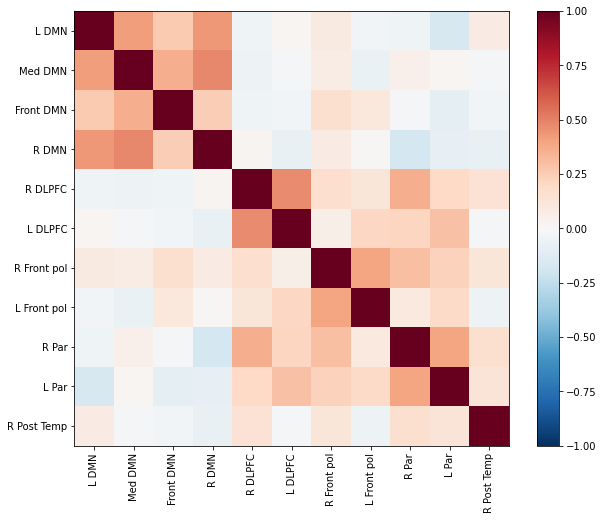

In [ ]:
#Plot correlation matrix
import numpy as np
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='RdBu_r', 
           norm=MidpointNormalize(vmin=-1, vmax=1, midpoint=0))
plt.colorbar()
tick_marks = [i for i in range(len(corr.columns))]
plt.xticks(tick_marks, corr.columns, rotation='vertical')
plt.yticks(tick_marks, corr.columns)

plt.show()

Here we focus on comparing the internetwork connectivities. The correlation matrix shows that:


*   The default mode network (DMN) is anticorrelated with the executive control network (ECN) as depicted by the light blue corner of the matrix.
*   The regions of interest in the ECN are themselves positively correlated with one another as parts of a network as depicted by bottom light right red corner of the matrix.

*   The interconnectivity of the DMN, however, is evidently higher than the interconnectivity of the ECN as it should be at rest as depcited by the top left red corner of the matrix.
